# Code for Drawing All the Plots

## Load CSV Data

In [119]:
import csv

csvData = []

with open('result/repo_info_selected_edited.csv') as csvFile:
    csvReader = csv.DictReader(csvFile)
    for row in csvReader:
        csvData.append(row)

## Load JSON Data

In [171]:
import json

jsonData = []

with open('temp/repo_info_selected.json') as jsonFile:
    jsonData = json.load(jsonFile)

## Average comment density of different language

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def extract(lang, key):
    return np.array([float(row[key]) for row in csvData if row['language'] == lang])

langs = ['Python', 'Java', 'C++', 'JavaScript', 'Go']
comment_densities = [extract(lang, 'comment_ratio') for lang in langs]
avgs = [np.average(a) for a in comment_densities]
medians = [np.median(a) for a in comment_densities]
variances = [np.var(a) for a in comment_densities]

In [93]:
avgs

[0.3525416864333334,
 0.29399548046666674,
 0.1424895722,
 0.16026265626666666,
 0.14789911586666668]

In [94]:
medians

[0.2640942395, 0.255118774, 0.1386390515, 0.1546521005, 0.13934088]

In [95]:
variances

[0.08098209571192999,
 0.061977219962504014,
 0.0025379404059735103,
 0.011386012040948114,
 0.0033611595655458943]

In [104]:
from scipy import stats
# Conduct Wilcoxon rank-sum test for all languages
pvalues = []
for i in range(len(langs)):
    row = []
    for j in range(len(langs)):
        lang1 = langs[i]
        lang2 = langs[j]
        statistics, pvalue = stats.ranksums(comment_densities[i], comment_densities[j])
        row.append(pvalue)
    pvalues.append(row)
pvalues

[[1.0,
  0.4420179139756857,
  0.0003877821295709836,
  0.003419010448554348,
  0.000833930330010351],
 [0.4420179139756857,
  1.0,
  0.002688839981756471,
  0.011466967943295216,
  0.004325494122990468],
 [0.0003877821295709836,
  0.002688839981756471,
  1.0,
  0.72271979157106,
  0.7562013389413471],
 [0.003419010448554348,
  0.011466967943295216,
  0.72271979157106,
  1.0,
  0.9764109078760824],
 [0.000833930330010351,
  0.004325494122990468,
  0.7562013389413471,
  0.9764109078760824,
  1.0]]

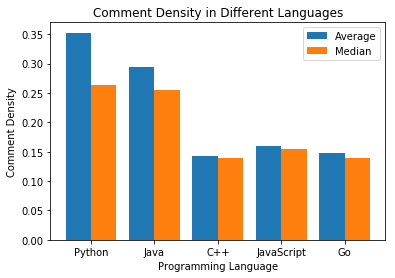

In [96]:
plt.bar([1,6,11,16,21], avgs, width=2, align='center', label='Average')
plt.bar([3,8,13,18,23], medians, width=2, align='center', label='Median')
plt.xticks([2,7,12,17,22], langs)
plt.xlabel('Programming Language')
plt.ylabel('Comment Density')
plt.legend()
plt.title('Comment Density in Different Languages')
plt.savefig('result/figures/cd_by_lang.pdf', bbox_inches='tight')
plt.show()

## Difference in Comment Density for Different Type of Projects

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def extract(lang, type_):
    return [float(row['comment_ratio']) 
         for row in csvData 
         if row['language'] == lang and row['type'] == type_]

types = ['tutorial', 'framework', 'library', 'app']
cd_java = [np.array(extract('Java', t)) for t in types];
cd_js = [np.array(extract('JavaScript', t)) for t in types];
avgs_java = [np.average(a) for a in cd_java]
avgs_js = [np.average(a) for a in cd_js]

In [111]:
from scipy import stats
# Conduct Wilcoxon rank-sum test for Java
pvalues = []
for i in range(len(types)):
    row = []
    for j in range(len(types)):
        type1 = types[i]
        type2 = types[j]
        statistics, pvalue = stats.ranksums(cd_java[i], cd_java[j])
        row.append(pvalue)
    pvalues.append(row)
pvalues

[[1.0, 0.17452534056858338, 0.18644918121998122, 0.10105025592540995],
 [0.17452534056858338, 1.0, 0.6797081543484927, 0.025347318677468252],
 [0.18644918121998122, 0.6797081543484927, 1.0, 0.010126539818322079],
 [0.10105025592540995, 0.025347318677468252, 0.010126539818322079, 1.0]]

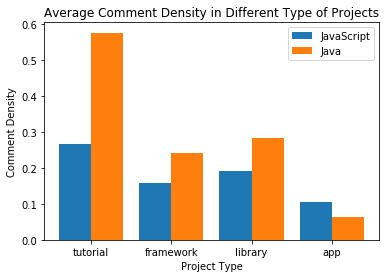

In [108]:
plt.bar([i for i in range(0, 4)], avgs_js, width=0.4, label="JavaScript")
plt.bar([i+0.4 for i in range(0, 4)], avgs_java, width=0.4, label="Java")
plt.xticks([i+0.2 for i in range(0, 4)], types)
plt.title('Average Comment Density in Different Type of Projects')
plt.xlabel('Project Type')
plt.ylabel('Comment Density')
plt.legend()
plt.savefig('result/figures/avg_cd_java_js.pdf', bbox_inches='tight')
plt.show()

## Relationship between Comment Density and Number of Contributors

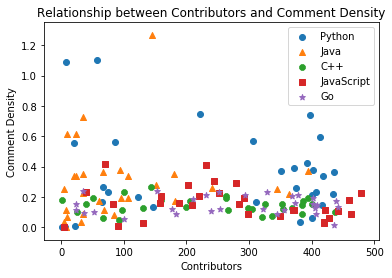

In [188]:
import matplotlib.pyplot as plt

langs = ['Python', 'Java', 'C++', 'JavaScript', 'Go']
comment_densities = [[float(row['comment_ratio']) 
                          for row in csvData if row['language'] == lang] 
                     for lang in langs]
contributors = [[float(row['contributors']) 
                     for row in csvData if row['language'] == lang] 
                for lang in langs]

markers = ['o', '^', '8', 's', '*']
for i in range(len(langs)):
    plt.scatter(contributors[i], comment_densities[i], label=langs[i], marker=markers[i])
plt.legend()
plt.xlabel('Contributors')
plt.ylabel('Comment Density')
plt.title('Relationship between Contributors and Comment Density')
plt.savefig('result/figures/cd_contrb.pdf', bbox_inches='tight')
plt.show()

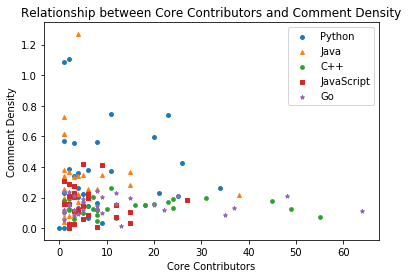

In [181]:
langs = ['Python', 'Java', 'C++', 'JavaScript', 'Go']
comment_densities = [[float(row['comment_ratio']) 
                          for row in csvData if row['language'] == lang] 
                     for lang in langs]
core_contributors = {
    'Python': [],
    'Java': [],
    'C++': [],
    'JavaScript': [],
    'Go': []
}

for row in csvData:
    for data in jsonData:
        if data['full_name'] != row['full_name']:
            continue
        core_contrib = 0
        contributor_list = data['contributors']
        leader_contribution = contributor_list[0]['contributions']
        for c in contributor_list:
            if c['contributions'] > 1 and c['contributions'] > 0.05 * leader_contribution:
                core_contrib += 1
        core_contributors[row['language']].append(core_contrib)
   
markers = ['o', '^', '8', 's', '*']
for i in range(len(langs)):
    plt.scatter(core_contributors[langs[i]], comment_densities[i], s=15, label=langs[i], marker=markers[i])
plt.legend()
plt.xlabel('Core Contributors')
plt.ylabel('Comment Density')
plt.title('Relationship between Core Contributors and Comment Density')
plt.savefig('result/figures/cd_core_contrib.pdf', bbox_inches='tight')
plt.show()

## Relationship between Project Size and Comment Density

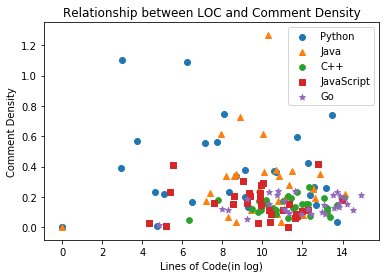

In [189]:
import matplotlib.pyplot as plt
import math

langs = ['Python', 'Java', 'C++', 'JavaScript', 'Go']
comment_densities = [[float(row['comment_ratio']) 
                          for row in csvData if row['language'] == lang] 
                     for lang in langs]
lines_of_code = [[float(row['lines_code']) 
                     for row in csvData if row['language'] == lang] 
                for lang in langs]
log_loc = [[math.log(i+1) for i in a] for a in lines_of_code]

markers = ['o', '^', '8', 's', '*']
for i in range(len(langs)):
    plt.scatter(log_loc[i], comment_densities[i], label=langs[i], marker=markers[i])
plt.legend()
plt.xlabel('Lines of Code(in log)')
plt.ylabel('Comment Density')
plt.title('Relationship between LOC and Comment Density')
plt.savefig('result/figures/cd_loc.pdf', bbox_inches='tight')
plt.show()